FIAP - Tecnólogo em Sistema para Internet 

# Aula 14 - KNN

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Importar o dataset

In [59]:
tabela = datasets.load_wine()

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [19]:
entradas = tabela.data
saidas = tabela.target

In [20]:
entradas[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

# Dividir o dataset em TREINO e TESTE

In [21]:
X_train, X_test, y_train, y_test = train_test_split(entradas,
                                                    saidas,
                                                    test_size=0.3,
                                                    random_state=42)

In [22]:
print("N dados = ", len(entradas))
print("X_train = ", len(X_train))
print("X_test = ", len(X_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

N dados =  178
X_train =  124
X_test =  54
y_train =  124
y_test =  54


# Criar o modelo SEM normalização dos dados

## Primeiro modelo, com k=5

In [24]:
# Definir o modelo
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Treinar o modelo
knn.fit(X_train, y_train)

# Avaliar o modelo
y_pred = knn.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(f"Acurácia: {acc:.4f}")

Acurácia: 0.7407


# Modelo genérico, via função

In [38]:
def meu_knn(X_train, X_test, y_train, y_test, k=0):
    # Definir o modelo
    if k == 0:
        k = int((len(y_train) + len(y_test)) ** 0.5)
    knn = KNeighborsClassifier(n_neighbors=k)

    # Treinar o modelo
    knn.fit(X_train, y_train)

    # Avaliar o modelo
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"k={k}\tAcurácia: {acc:.4f}")

In [39]:
meu_knn(X_train, X_test, y_train, y_test, 5)

k=5	Acurácia: 0.7407


In [40]:
meu_knn(X_train, X_test, y_train, y_test, 7)

k=7	Acurácia: 0.7593


In [41]:
meu_knn(X_train, X_test, y_train, y_test)

k=13	Acurácia: 0.7593


# Criar o modelo COM normalização dos dados

## Normalizar pelo valor MIN e MAX

In [43]:
# Normalizar os dados
norm = MinMaxScaler()

X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [45]:
# Avaliar o modelo
meu_knn(X_train_norm, X_test_norm, y_train, y_test)

k=13	Acurácia: 0.9815


In [46]:
meu_knn(X_train_norm, X_test_norm, y_train, y_test, k=5)

k=5	Acurácia: 0.9444


## Padronizando os dados com DESVIO PADRÃO

In [47]:
# Padronizando os dados
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Avaliar o modelo
meu_knn(X_train_scaled, X_test_scaled, y_train, y_test)

k=13	Acurácia: 0.9630


In [49]:
meu_knn(X_train_norm, X_test_norm, y_train, y_test, k=5)

k=5	Acurácia: 0.9444


## Verificando a distribuição dos dados

In [60]:
df = pd.DataFrame(X_train, tabela.feature_names)
df

ValueError: Shape of passed values is (124, 13), indices imply (13, 13)

In [ ]:
df["alcohol"].plot.hist()

AttributeError: 'Rectangle' object has no property 'legen'

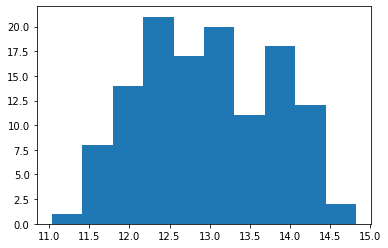

In [61]:
import matplotlib.pyplot as plt

for coluna in df.columns:
    df[coluna].plot.hist(legen=True)
    plt.show()

# Exercício! Faça o KNN sobre a base Fertility

Base disponível no Teams >> Notebooks >> DATASETS

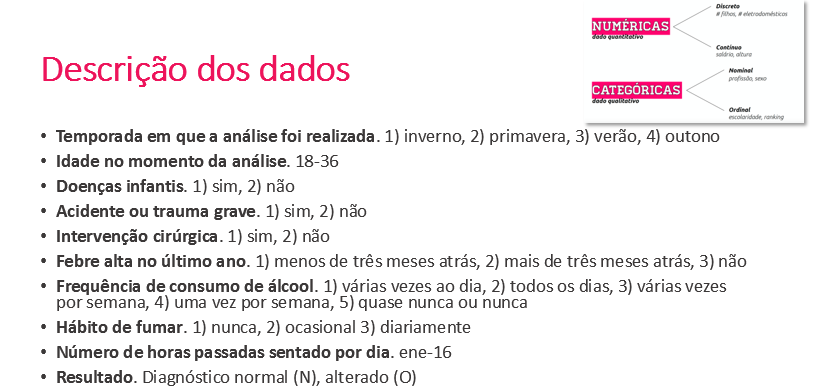

In [ ]:
import pandas as pd

colunas = ["temporada", "idade", "doenças infantis", "acidente",
           "cirurgia", "febre", "alcool", "fumo", "horas_sentado",
           "output"]
df = pd.read_csv(r"DATASETS\fertility_Diagnosis.txt", header=None)
df.columns = colunas

In [ ]:
df.head()

## Resolução

- Todos os dados são numéricos, exceto o Label, então vamos transformá-lo em 0-1, sendo: N=0; O=1
- Feito isso, separamos os dados em Treino e Teste, usando uma proporção pertinente. Ex: 70/30%
- Normalizamos os dados
- Aplicamos o KNN
- Medimos os resultados

Vemos que nenhuma feature segue a distribuição normal, então é melhor normalizar pelo "MinMax".

A primeira execução usa a normalização (min/max), a segunda usa a padronização (desvio padrão).

In [ ]:
# Avaliar o modelo


# Avaliar o modelo


Já para o K ideal, a forma de padronizar os dados é indiferente:

In [ ]:
# Avaliar o modelo


# Avaliar o modelo
